# Assignment 5 - K-Means Clustering

In [1]:
# import required python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import dataset
dataset = pd.read_csv("datasets/sale.csv")
dataset.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
# keep only columns which are required
dataset = dataset[["SALES", "MSRP"]]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SALES   2823 non-null   float64
 1   MSRP    2823 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 44.2 KB


In [4]:
# check for null values
dataset.isnull().sum()

SALES    0
MSRP     0
dtype: int64

In [5]:
# check for negative values in dataset
dataset.describe()

,SALES,MSRP
count,2823.000000,2823.000000
mean,3553.889072,100.715551
std,1841.865106,40.187912
min,482.130000,33.000000
25%,2203.430000,68.000000
50%,3184.800000,99.000000
75%,4508.000000,124.000000
max,14082.800000,214.000000


In [6]:
# scale the values of columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for column in dataset:
    dataset[column] = scaler.fit_transform(dataset[[column]])
dataset.head()

,SALES,MSRP
0,0.175644,0.342541
1,0.167916,0.342541
2,0.250150,0.342541
3,0.240030,0.342541
4,0.347273,0.342541


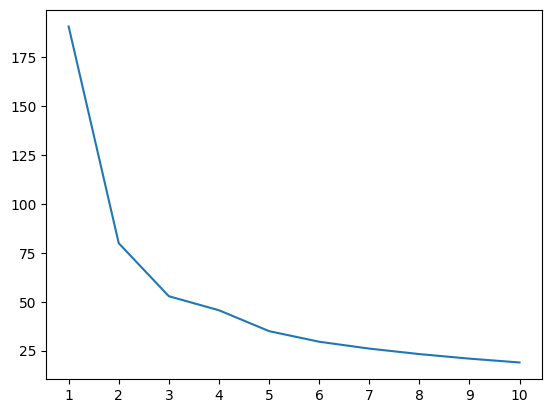

In [7]:
# Use elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

k = range(1,11)
wcss = []

for i in k:
    model = KMeans(n_clusters=i)
    model.fit(dataset)
    wcss.append(model.inertia_)

sns.lineplot(x=k, y=wcss)
plt.xticks(k)
plt.show()

In [8]:
# train the k means model with optimal number of clusters
optimal_k = 3

final_model = KMeans(n_clusters=optimal_k)
dataset["CLUSTER"] = final_model.fit_predict(dataset)
dataset.head()

,SALES,MSRP,CLUSTER
0,0.175644,0.342541,2
1,0.167916,0.342541,2
2,0.250150,0.342541,2
3,0.240030,0.342541,2
4,0.347273,0.342541,2


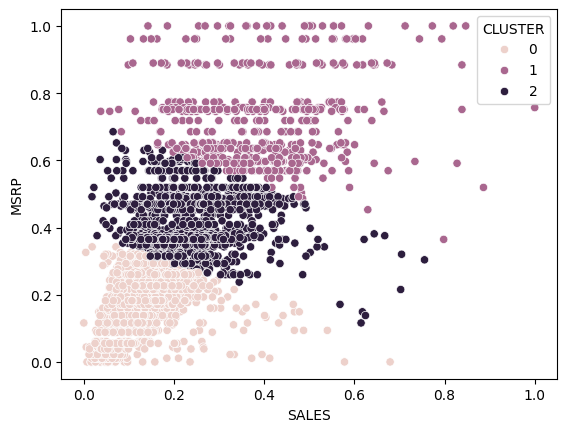

In [9]:
# plot clusters 
sns.scatterplot(data=dataset, x="SALES", y="MSRP", hue="CLUSTER")
plt.show()